# General Overview - Machine Learning

For this binary classification problem, we are using Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier, Gaussian Naive Bayes, and Support Vector Classifier. To assess the accuracy, we look at the accuracy scores and classification reports.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import (cross_val_score, 
                                     GridSearchCV, 
                                     train_test_split,  
                                     KFold)
from sklearn.metrics import (classification_report,
                             confusion_matrix, 
                             accuracy_score)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

/Users/annatang/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
np.random.seed(42)

In [3]:
data = pd.read_csv('diabetes_ml_scale.csv', index_col=0) # import data
diabetes = data.copy() # save a copy of data as diabetes

In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61678 entries, 0 to 61677
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  61678 non-null  int64  
 1   diabetesMed             61678 non-null  int64  
 2   time_in_hospital        61678 non-null  float64
 3   num_lab_procedures      61678 non-null  float64
 4   num_procedures          61678 non-null  float64
 5   num_medications         61678 non-null  float64
 6   num_outpatient          61678 non-null  float64
 7   num_inpatient           61678 non-null  float64
 8   num_diagnoses           61678 non-null  float64
 9   change                  61678 non-null  int64  
 10  AfricanAmerican         61678 non-null  int64  
 11  Asian                   61678 non-null  int64  
 12  Caucasian               61678 non-null  int64  
 13  Hispanic                61678 non-null  int64  
 14  Other_race              61678 non-null

In [5]:
diabetes.head()

,gender,diabetesMed,time_in_hospital,num_lab_procedures,num_procedures,num_medications,num_outpatient,num_inpatient,num_diagnoses,change,...,No_insulin,Steady_insulin,Up_insulin,Elective,Emergency,Newborn,Trauma Center,Unknown_admission_type,Urgent,readmitted
0,1,1,-0.403967,0.850369,-0.806274,0.411509,-0.312996,-0.300684,0.908151,1,...,0,0,1,0,1,0,0,0,0,YES
1,1,1,-0.767225,-1.577505,2.101774,-0.284438,3.419959,3.325751,-0.607611,0,...,1,0,0,0,1,0,0,0,0,NO
2,0,1,-0.767225,0.091658,-0.224664,0.133130,-0.312996,-0.300684,-0.102357,1,...,0,0,1,0,1,0,0,0,0,NO
3,0,1,-1.130484,0.445723,-0.806274,-0.980385,-0.312996,-0.300684,-1.112865,1,...,0,1,0,0,1,0,0,0,0,NO
4,0,1,-0.403967,-0.565891,2.683383,0.133130,-0.312996,-0.300684,0.908151,0,...,0,1,0,0,0,0,0,0,1,YES


In [6]:
# separate variables
y = diabetes['readmitted'].values # target variable
X = diabetes.drop('readmitted', axis=1).values

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(43174, 67) (43174,)
(18504, 67) (18504,)


# Logistic Regression

In [7]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set: ', logreg.score(X_train, y_train))
print('Accuracy Score, Test Set: ', logreg.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, logreg_pred))

/Users/annatang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy Score, Training Set:  0.6204660212164729
Accuracy Score, Test Set:  0.6132728058798098
Classification Report 

              precision    recall  f1-score   support

          NO       0.62      0.89      0.73     11095
         YES       0.55      0.20      0.29      7409

    accuracy                           0.61     18504
   macro avg       0.59      0.54      0.51     18504
weighted avg       0.59      0.61      0.56     18504



Confusion Matrix 
 [[9892 1203]
 [5953 1456]]


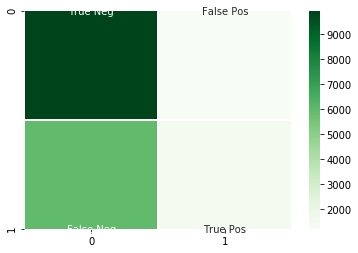

In [8]:
# confusion matrix
cm = confusion_matrix(y_test, logreg_pred)
print('Confusion Matrix \n', cm)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Greens')
plt.show()

## Parameter Tuning

In [9]:
# parameter tuning - C
parameters = {'C': [0.001, 0.01, 0.1, 1, 10]}
clf = GridSearchCV(logreg, parameters, cv=3, verbose=1, n_jobs=-1)
clf.fit(X, y).best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    6.3s finished


{'C': 0.01}

In [10]:
# using parameters
logreg = LogisticRegression(random_state=42, C=0.01)
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set: {}'.format(logreg.score(X_train, y_train)))
print('Accuracy Score, Test Set: {}'.format(logreg.score(X_test, y_test)))

# classification report
print('Classification Report \n')
print(classification_report(y_test, logreg_pred))

Accuracy Score, Training Set: 0.6206744800111178
Accuracy Score, Test Set: 0.6128404669260701
Classification Report 

              precision    recall  f1-score   support

          NO       0.62      0.90      0.74     11095
         YES       0.55      0.18      0.28      7409

    accuracy                           0.61     18504
   macro avg       0.59      0.54      0.51     18504
weighted avg       0.59      0.61      0.55     18504



Confusion Matrix 
 [[9974 1121]
 [6043 1366]]


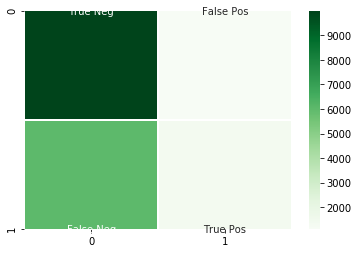

In [11]:
# confusion matrix
cm = confusion_matrix(y_test, logreg_pred)
print('Confusion Matrix \n', cm)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Greens')
plt.show()

# Decision Tree Classifier

In [12]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set: {}'.format(decision_tree.score(X_train, y_train)))
print('Accuracy Score, Test Set: {}'.format(decision_tree.score(X_test, y_test)))

# classification report
print('Classification Report \n')
print(classification_report(y_test, decision_tree_pred)) # very overfitted

Accuracy Score, Training Set: 0.9999768379117061
Accuracy Score, Test Set: 0.539396887159533
Classification Report 

              precision    recall  f1-score   support

          NO       0.62      0.61      0.61     11095
         YES       0.43      0.43      0.43      7409

    accuracy                           0.54     18504
   macro avg       0.52      0.52      0.52     18504
weighted avg       0.54      0.54      0.54     18504



Confusion Matrix 
 [[6783 4312]
 [4211 3198]]


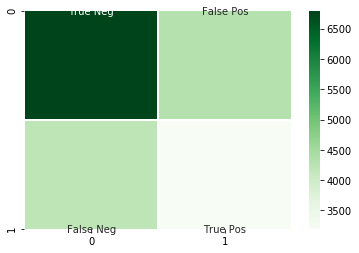

In [13]:
# confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Greens')
plt.show()

The Decision Tree Classifier training set is very over fitted compared to the test set, which means that we have to tune the model's parameters so that it is learning the data instead of memorizing it.

## parameter tuning

We are focused on the criterion, max_depth, and min_samples_split parameters.

In [14]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [15]:
# hyperparameter tuning
criterion = ['gini', 'entropy']
max_depth = [2, 4, 5, 8, 10]
min_samples_split = [2, 8, 14, 16]

parameters = dict(max_depth=max_depth, criterion=criterion, min_samples_split=min_samples_split)

dt_gs = GridSearchCV(decision_tree, parameters, cv=3, verbose=1, n_jobs=-1)
dt_gs.fit(X_train, y_train).best_params_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   10.1s finished


{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 16}

In [16]:
# using new parameters - much better, overfitting problem reduced
decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_split=16)
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', decision_tree.score(X_train, y_train))
print('Accuracy Score, Test Set:', decision_tree.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, decision_tree_pred))

Accuracy Score, Training Set: 0.6223189882799833
Accuracy Score, Test Set: 0.6103004755728492
Classification Report 

              precision    recall  f1-score   support

          NO       0.62      0.90      0.74     11095
         YES       0.54      0.17      0.26      7409

    accuracy                           0.61     18504
   macro avg       0.58      0.54      0.50     18504
weighted avg       0.59      0.61      0.54     18504



Confusion Matrix 
 [[10033  1062]
 [ 6149  1260]]


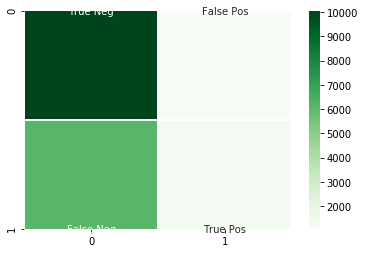

In [17]:
# confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Greens')
plt.show()

## cross validation - k folds

In [18]:
kf = KFold(n_splits=5) # split into 5 folds 
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print('Iteration: ')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    decision_tree = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=5, min_samples_split=16)
    decision_tree.fit(X_train, y_train)
    decision_tree_pred = decision_tree.predict(X_test)
    
    # accuracy scores
    print('Accuracy Score, Training Set:', decision_tree.score(X_train, y_train))
    print('Accuracy Score, Test Set:', decision_tree.score(X_test, y_test))
    
    # classification report
    print('Classification Report \n')
    print(classification_report(y_test, decision_tree_pred))

Iteration: 
Accuracy Score, Training Set: 0.6257954683636658
Accuracy Score, Test Set: 0.5920071335927367
Classification Report 

              precision    recall  f1-score   support

          NO       0.59      0.95      0.73      6987
         YES       0.66      0.12      0.21      5349

    accuracy                           0.59     12336
   macro avg       0.62      0.54      0.47     12336
weighted avg       0.62      0.59      0.50     12336

Iteration: 
Accuracy Score, Training Set: 0.6090956994041588
Accuracy Score, Test Set: 0.6569390402075227
Classification Report 

              precision    recall  f1-score   support

          NO       0.67      0.92      0.77      7885
         YES       0.58      0.18      0.28      4451

    accuracy                           0.66     12336
   macro avg       0.62      0.55      0.53     12336
weighted avg       0.63      0.66      0.60     12336

Iteration: 
Accuracy Score, Training Set: 0.6418061691864942
Accuracy Score, Test Set:

# Gradient Boosting Classifier

In [19]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', gbc.score(X_train, y_train))
print('Accuracy Score, Test Set:', gbc.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, gbc_pred))

Accuracy Score, Training Set: 0.6182234562146607
Accuracy Score, Test Set: 0.6495338467774625
Classification Report 

              precision    recall  f1-score   support

          NO       0.75      0.76      0.76      8853
         YES       0.38      0.37      0.38      3482

    accuracy                           0.65     12335
   macro avg       0.57      0.57      0.57     12335
weighted avg       0.65      0.65      0.65     12335



Confusion Matrix 
 [[6711 2142]
 [2181 1301]]


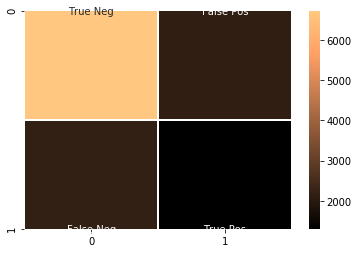

In [20]:
# confusion matrix
cm = confusion_matrix(y_test, gbc_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='copper')
plt.show()

## cross validation - k folds

In [21]:
kf = KFold(n_splits=5) # split into 5 folds 
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print('Iteration: ')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    gbc = GradientBoostingClassifier(random_state=42)
    gbc.fit(X_train, y_train)
    gbc_pred = gbc.predict(X_test)
    
    # accuracy scores
    print('Accuracy Score, Training Set:', gbc.score(X_train, y_train))
    print('Accuracy Score, Test Set:', gbc.score(X_test, y_test))
    
    # classification report
    print('Classification Report \n')
    print(classification_report(y_test, gbc_pred))

Iteration: 
Accuracy Score, Training Set: 0.632888816829476
Accuracy Score, Test Set: 0.5898994811932555
Classification Report 

              precision    recall  f1-score   support

          NO       0.58      0.96      0.73      6987
         YES       0.67      0.11      0.19      5349

    accuracy                           0.59     12336
   macro avg       0.63      0.53      0.46     12336
weighted avg       0.62      0.59      0.49     12336

Iteration: 
Accuracy Score, Training Set: 0.6196343885533623
Accuracy Score, Test Set: 0.6511835278858625
Classification Report 

              precision    recall  f1-score   support

          NO       0.67      0.90      0.77      7885
         YES       0.54      0.21      0.30      4451

    accuracy                           0.65     12336
   macro avg       0.61      0.55      0.53     12336
weighted avg       0.62      0.65      0.60     12336

Iteration: 
Accuracy Score, Training Set: 0.6475416480888493
Accuracy Score, Test Set: 

## parameter tuning

In [22]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [23]:
# abbreviated parameter tuning
n_estimators = [10, 20, 50, 60, 80]
max_depth = [2, 4, 6, 8, 10, 14]

parameters = dict(n_estimators=n_estimators, max_depth=max_depth)

gbc_gs = GridSearchCV(gbc, parameters, cv=3, verbose=1, n_jobs=-1)
gbc_gs.fit(X_train, y_train).best_params_

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.8min finished


{'max_depth': 4, 'n_estimators': 60}

In [24]:
# using new parameters
gbc = GradientBoostingClassifier(random_state=42, max_depth=4, n_estimators=60)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', gbc.score(X_train, y_train))
print('Accuracy Score, Test Set:', gbc.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, gbc_pred))

Accuracy Score, Training Set: 0.6228644387248444
Accuracy Score, Test Set: 0.6503445480340495
Classification Report 

              precision    recall  f1-score   support

          NO       0.75      0.76      0.76      8853
         YES       0.38      0.37      0.38      3482

    accuracy                           0.65     12335
   macro avg       0.57      0.57      0.57     12335
weighted avg       0.65      0.65      0.65     12335



# Random Forest Classifier

In [25]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', forest.score(X_train, y_train))
print('Accuracy Score, Test Set:', forest.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, forest_pred))

Accuracy Score, Training Set: 0.9999797337008289
Accuracy Score, Test Set: 0.609566274827726
Classification Report 

              precision    recall  f1-score   support

          NO       0.75      0.69      0.72      8853
         YES       0.34      0.41      0.37      3482

    accuracy                           0.61     12335
   macro avg       0.54      0.55      0.55     12335
weighted avg       0.63      0.61      0.62     12335



Confusion Matrix 
 [[6081 2772]
 [2044 1438]]


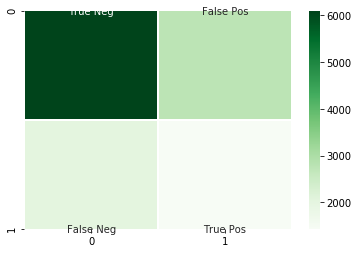

In [26]:
# confusion matrix
cm = confusion_matrix(y_test, forest_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Greens')
plt.show()

The original Random Forest Classifier has an over fitting problem with the training set. This can happen and therefore, we have to tune the model's parameters since it looks like the model just memorized sample structures rather than learning them.

## parameter tuning

The parameters we are tuning to optimize our model are criterion, max_depth and n_estimators.

In [27]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
# abbreviated parameter tuning
criterion = ['gini', 'entropy']
n_estimators = [10, 20, 50, 60, 80]
max_depth = [10, 15, 18, 20, 30]

parameters = dict(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)

forest_gs = GridSearchCV(forest, parameters, cv=3, verbose=1, n_jobs=-1)
forest_gs.fit(X_train, y_train).best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  1.5min finished


{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 20}

In [29]:
# using new parameters
forest = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, n_estimators=20)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', forest.score(X_train, y_train))
print('Accuracy Score, Test Set:', forest.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, forest_pred))

Accuracy Score, Training Set: 0.6434955312810328
Accuracy Score, Test Set: 0.6718281313336035
Classification Report 

              precision    recall  f1-score   support

          NO       0.74      0.83      0.78      8853
         YES       0.38      0.26      0.31      3482

    accuracy                           0.67     12335
   macro avg       0.56      0.55      0.55     12335
weighted avg       0.64      0.67      0.65     12335



Confusion Matrix 
 [[7367 1486]
 [2562  920]]


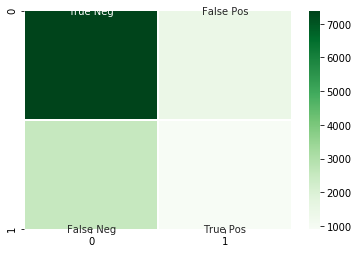

In [30]:
# confusion matrix
cm = confusion_matrix(y_test, forest_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Greens')
plt.show()

## cross validation - k folds

In [31]:
kf = KFold(n_splits=5) # split into 5 folds 
kf.get_n_splits(X)

for train_index, test_index in kf.split(X):
    print('Iteration: ')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    forest = RandomForestClassifier(random_state=42, criterion='entropy', max_depth=10, n_estimators=20)
    forest.fit(X_train, y_train)
    forest_pred = forest.predict(X_test)
    
    # accuracy scores
    print('Accuracy Score, Training Set:', forest.score(X_train, y_train))
    print('Accuracy Score, Test Set:', forest.score(X_test, y_test))
    
    # classification report
    print('Classification Report \n')
    print(classification_report(y_test, forest_pred))

Iteration: 
Accuracy Score, Training Set: 0.6463053787848081
Accuracy Score, Test Set: 0.582360570687419
Classification Report 

              precision    recall  f1-score   support

          NO       0.58      0.97      0.72      6987
         YES       0.66      0.08      0.14      5349

    accuracy                           0.58     12336
   macro avg       0.62      0.52      0.43     12336
weighted avg       0.61      0.58      0.47     12336

Iteration: 
Accuracy Score, Training Set: 0.6343074865226379
Accuracy Score, Test Set: 0.646076523994812
Classification Report 

              precision    recall  f1-score   support

          NO       0.66      0.94      0.77      7885
         YES       0.54      0.13      0.21      4451

    accuracy                           0.65     12336
   macro avg       0.60      0.53      0.49     12336
weighted avg       0.61      0.65      0.57     12336

Iteration: 
Accuracy Score, Training Set: 0.6628227473551943
Accuracy Score, Test Set: 0

# Gaussian Naive Bayes

In [32]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian_pred = gaussian.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', gaussian.score(X_train, y_train))
print('Accuracy Score, Test Set:', gaussian.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, gaussian_pred))

Accuracy Score, Training Set: 0.4545528241087895
Accuracy Score, Test Set: 0.33230644507498985
Classification Report 

              precision    recall  f1-score   support

          NO       0.80      0.09      0.17      8853
         YES       0.29      0.94      0.44      3482

    accuracy                           0.33     12335
   macro avg       0.55      0.52      0.30     12335
weighted avg       0.66      0.33      0.24     12335



Confusion Matrix 
 [[ 821 8032]
 [ 204 3278]]


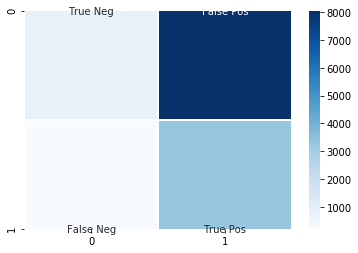

In [33]:
# confusion matrix
cm = confusion_matrix(y_test, gaussian_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Blues')
plt.show()

# Support Vector Classification

In [34]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# accuracy scores
print('Accuracy Score, Training Set:', svc.score(X_train, y_train))
print('Accuracy Score, Test Set:', svc.score(X_test, y_test))

# classification report
print('Classification Report \n')
print(classification_report(y_test, svc_pred))

Accuracy Score, Training Set: 0.6460085523782502
Accuracy Score, Test Set: 0.6507498986623429
Classification Report 

              precision    recall  f1-score   support

          NO       0.75      0.77      0.76      8853
         YES       0.37      0.34      0.36      3482

    accuracy                           0.65     12335
   macro avg       0.56      0.56      0.56     12335
weighted avg       0.64      0.65      0.65     12335



Confusion Matrix 
 [[6840 2013]
 [2295 1187]]


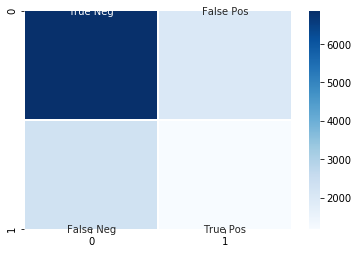

In [35]:
# confusion matrix
cm = confusion_matrix(y_test, svc_pred)
print('Confusion Matrix \n', cm)

labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt='', linewidths=.5, cmap='Blues')
plt.show()